In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\sshar127\\Desktop\\Python\\Balance Scale Dataset\\balance-scale.txt')

In [37]:
df_cat = pd.read_csv('C:\\Users\\sshar127\\Desktop\\Python\\Balance Scale Dataset\\balance-scale.txt')

In [3]:
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


## EDA

In [4]:
df.shape

(625, 5)

In [5]:
df.columns

Index(['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight',
       'Right-Distance'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of     Class Name  Left-Weight  Left-Distance  Right-Weight  Right-Distance
0            B            1              1             1               1
1            R            1              1             1               2
2            R            1              1             1               3
3            R            1              1             1               4
4            R            1              1             1               5
..         ...          ...            ...           ...             ...
620          L            5              5             5               1
621          L            5              5             5               2
622          L            5              5             5               3
623          L            5              5             5               4
624          B            5              5             5               5

[625 rows x 5 columns]>

In [7]:
df.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [8]:
df['Class Name'].unique()

array(['B', 'R', 'L'], dtype=object)

In [9]:
df['Class Name'].value_counts()

L    288
R    288
B     49
Name: Class Name, dtype: int64

In [10]:
df.isna().sum()

Class Name        0
Left-Weight       0
Left-Distance     0
Right-Weight      0
Right-Distance    0
dtype: int64

In [11]:
df_grp = df.groupby('Class Name')

In [24]:
b_grp = df_grp.get_group('B').head()
b_grp.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
26,B,1,2,1,2
30,B,1,2,2,1
52,B,1,3,1,3
60,B,1,3,3,1


In [25]:
l_grp = df_grp.get_group('L').head()
l_grp.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
25,L,1,2,1,1
50,L,1,3,1,1
51,L,1,3,1,2
55,L,1,3,2,1
75,L,1,4,1,1


In [26]:
r_grp = df_grp.get_group('R').head()
r_grp.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1


In [21]:
for class1, class_grp in df_grp:
    print (class1)
    print (class_grp)

B
    Class Name  Left-Weight  Left-Distance  Right-Weight  Right-Distance
0            B            1              1             1               1
26           B            1              2             1               2
30           B            1              2             2               1
52           B            1              3             1               3
60           B            1              3             3               1
78           B            1              4             1               4
81           B            1              4             2               2
90           B            1              4             4               1
104          B            1              5             1               5
120          B            1              5             5               1
126          B            2              1             1               2
130          B            2              1             2               1
153          B            2              2       

In [27]:
df = pd.get_dummies(df, columns = ['Class Name'], drop_first=True)

In [28]:
df.head()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance,Class Name_L,Class Name_R
0,1,1,1,1,0,0
1,1,1,1,2,0,1
2,1,1,1,3,0,1
3,1,1,1,4,0,1
4,1,1,1,5,0,1


In [29]:
corr = df.corr()
corr

,Left-Weight,Left-Distance,Right-Weight,Right-Distance,Class Name_L,Class Name_R
Left-Weight,1.000000,0.000000,0.000000,0.000000,0.399472,-0.392663
Left-Distance,0.000000,1.000000,0.000000,0.000000,0.399472,-0.392663
Right-Weight,0.000000,0.000000,1.000000,0.000000,-0.392663,0.399472
Right-Distance,0.000000,0.000000,0.000000,1.000000,-0.392663,0.399472
Class Name_L,0.399472,0.399472,-0.392663,-0.392663,1.000000,-0.854599
Class Name_R,-0.392663,-0.392663,0.399472,0.399472,-0.854599,1.000000


Text(0.5, 1.0, 'Data Features')

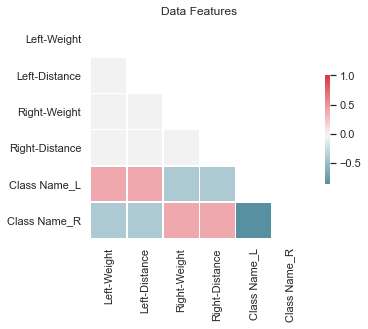

In [30]:
sns.set(style = 'white')
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots()
cmap = sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(corr, cmap = cmap, mask = mask, vmax = 1, center = 0, square = True,
           linewidth = .5, cbar_kws = {'shrink': .5})
ax.set_title('Data Features')

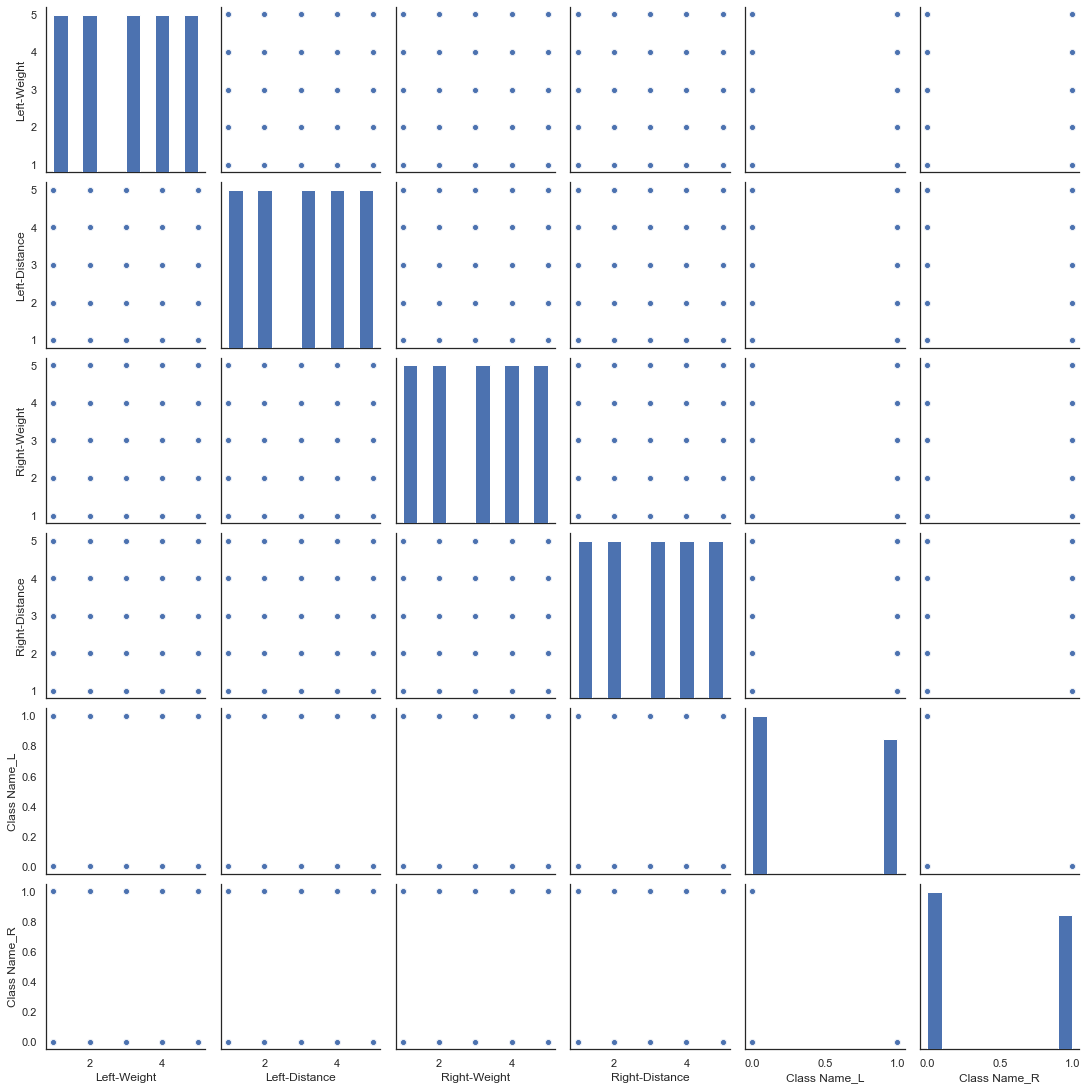

In [31]:
sns.pairplot(df)

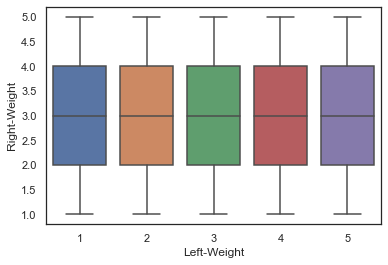

In [32]:
sns.boxplot(x = 'Left-Weight', y = 'Right-Weight', data = df)
plt.show()

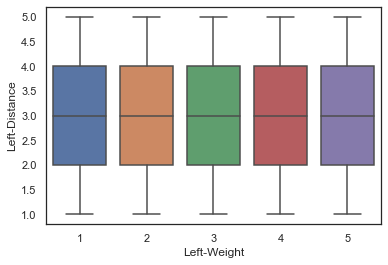

In [33]:
sns.boxplot(x = 'Left-Weight', y = 'Left-Distance', data = df)
plt.show()

In [34]:
df.columns

Index(['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance',
       'Class Name_L', 'Class Name_R'],
      dtype='object')

In [38]:
df_cat.columns

Index(['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight',
       'Right-Distance'],
      dtype='object')

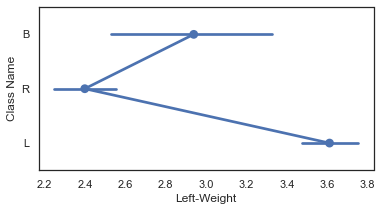

In [48]:
plt.subplots(figsize=(6,3))
sns.pointplot(x = 'Left-Weight', y = 'Class Name', data = df_cat)

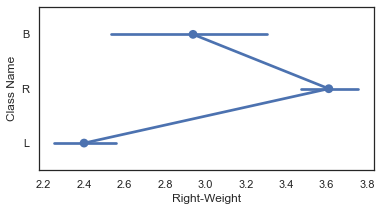

In [45]:
plt.subplots(figsize = (6,3))
sns.pointplot(x = 'Right-Weight', y = 'Class Name', data = df_cat)

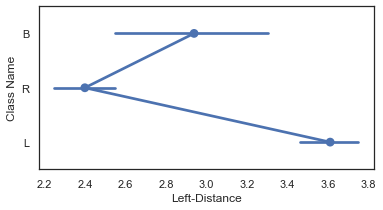

In [47]:
plt.subplots(figsize = (6,3))
sns.pointplot(x = 'Left-Distance', y = 'Class Name', data = df_cat)

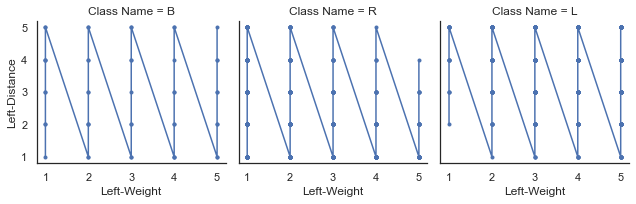

In [49]:
g = sns.FacetGrid(data = df_cat, col = 'Class Name', col_wrap = 3, height = 3)
g = g.map(plt.plot, 'Left-Weight', 'Left-Distance', marker = '.')

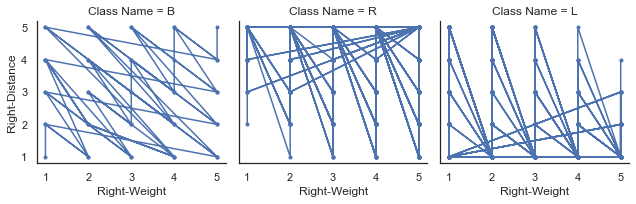

In [50]:
g = sns.FacetGrid(data = df_cat, col = 'Class Name', col_wrap = 3, height = 3)
g = g.map(plt.plot, 'Right-Weight', 'Right-Distance', marker = '.')

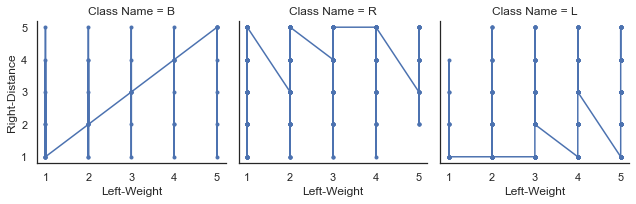

In [51]:
g = sns.FacetGrid(data = df_cat, col = 'Class Name', col_wrap = 3, height = 3)
g = g.map(plt.plot, 'Left-Weight', 'Right-Distance', marker = '.')

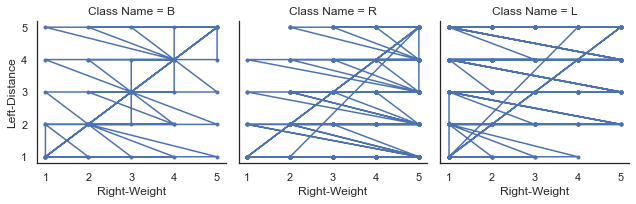

In [52]:
g = sns.FacetGrid(data = df_cat, col = 'Class Name', col_wrap = 3, height = 3)
g = g.map(plt.plot, 'Right-Weight', 'Left-Distance', marker = '.')

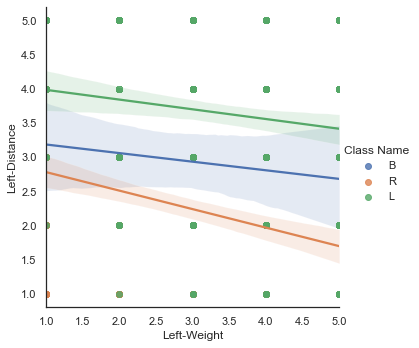

In [54]:
#sns.lmplot(x = 'Left-Distance', y = 'Class Name', data = df_cat, hue = 'Class Name')
sns.lmplot(x = 'Left-Weight', y = 'Left-Distance', data=df_cat, hue='Class Name');

In [57]:
df.columns

Index(['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance',
       'Class Name_L', 'Class Name_R'],
      dtype='object')

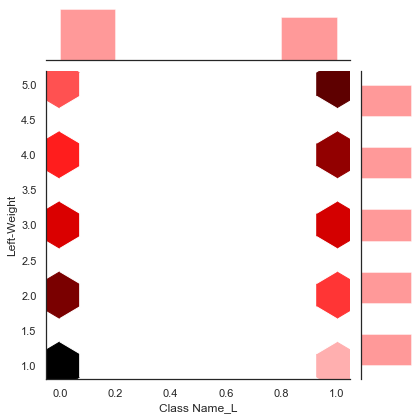

In [58]:
sns.jointplot(df['Class Name_L'], df_cat['Left-Weight'], color='red', kind = 'hex')

In [59]:
df.head()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance,Class Name_L,Class Name_R
0,1,1,1,1,0,0
1,1,1,1,2,0,1
2,1,1,1,3,0,1
3,1,1,1,4,0,1
4,1,1,1,5,0,1
